# Exploratory data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a>
    <ul><a href="#data">The Datasets</a></ul>
</li>
<li><a href="#wrangling">Data Wrangling</a>
    <ul><a href="#gather">Data Gathering</a></ul>
    <ul><a href="#assess">Data Assessment</a></ul>
    <ul><a href="#clean">Data Cleaning</a></ul>
</li>
    
<li><a href="#viz">Data Visualization and Analysis</a></li>
<li><a href="#conclusions">Conclusion</a></li>
</ul>

<a id="#intro"></a>
# Introduction

Dogs are the only mammal on earth having the most variable number of breeds. The [Fédération Cynologique Internationale (FCI)](https://www.hillspet.com/dog-care/behavior-appearance/how-many-dog-breeds-are-there), list about 360 breeds gobally, the **Labrador retriever** being the most popular of them all based on a rating by the [American Kennel Club](https://www.akc.org/most-popular-breeds/) in 2021.

As part of the requirement to complete the data analyst nanodegree course on Udacity, this data wrangling project was carried out on various dog data.

The 3 major objectives of this project is to:
1. Gather dogs data from different sources in different file formats and
2. Clean the data in preparation for analysis.
3. Uncover basic insights about dogbreeds in the data.


<a href="#data"></a>
## The Data
The main dataset is the tweet archive of a Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. You can read more about them [here]().

This data was emailed to the Udacity team by WeRateDogs as a **csv** file exclusively for use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.


The first additional data was scraped from the **twitter's API** using the *tweepy* library on python. This data was required to get the number of likes (**favorite_count**) and retweets (**retweet_count**) each @WeRateDogs' tweets get since they were not included in the Twitter archive.

The last additional data was genrated from the Twitter archive after each image in the archive was ran through a [neural network](https://www.youtube.com/watch?v=2-Ol7ZB0MmU) that can clasify breeds of dogs (although this is beyond the scope of this project but you can learn more about this was done on the Udacity's [Machine Learning Engineer Nanodegree course](https://www.udacity.com/course/machine-learning-engineer-nanodegree--nd009)). The result was provided as a **tsv** files available for download on Udacity's website.




<a id="#wrangling"></a>
# Data wrangling

Data wrangling is a core part of data science. It involves bringing data together from various sources and organizing them in preparation for analysis. As earlier stated, data wrangling is the core focus of this project.

In [ ]:
# import necessary modules
import pandas as pd
import numpy as np
import requests
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt

<a id="#gather"></a>
## Data Gathering
### 1. Main data: the Twitter archive
This was provided as a **CSV** file.

In [ ]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [ ]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 2. The predicted image file

Gathering method: Use the *requests* library to download the tweet image prediction (image_predictions.tsv).

In [ ]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

image_prediction_df = pd.read_csv(url.split('/')[-1], sep = '\t')

In [ ]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 3. Additional tweet data
Gathering method: use the *Tweepy* library to query additional data via the Twitter API and save it as (tweet_json.txt).

In [ ]:
# pip install tweepy

The API is used to programmatically get all tweet in twitter's db by their tweet_id. We will then go ahead to query the resulting JSON data.

In [ ]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

consumer_key = '************************'
consumer_secret = '************************************************'
access_token = '************************************************'
access_secret = '************************************************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# to test our API
# query directly from the _json through API not the saved json.txt
'''
tweet_id = "892420643555336193"
tweet = api.get_status(tweet_id, tweet_mode='extended')
print(tweet._json['full_text'])
'''

'\ntweet_id = "892420643555336193"\ntweet = api.get_status(tweet_id, tweet_mode=\'extended\')\nprint(tweet._json[\'full_text\'])\n'

> No need to run this next set of code every time

> "*tweepy.errors.TweepyException*" was changed from the default "*tweepy.errors.TweepError*"

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
'''
count = 0
fails_dict = {}
start = timer()
tweet_ids = twitter_archive_df.tweet_id.values
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

' \ncount = 0\nfails_dict = {}\nstart = timer()\ntweet_ids = twitter_archive_df.tweet_id.values\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.errors.TweepyException as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)\n'

> Why didn't we just save it as '.json' instead of '.txt'?

Note: our file is written in JSON structure but saved as a txt file.
So we have to first read the text file then convert each object in the JSON file to its corresponding python object ([deserialization](https://www.geeksforgeeks.org/read-json-file-using-python/))

Why do we need to do this? This is to enable us access the text as a python dictionary.

In [ ]:
tweets = []
with open("tweet_json.txt", "r", encoding = 'utf-8') as file:
    text_lines = file.readlines()
#     print(type(text_lines))
# line 4 of this code is a str compared to line 7 which is a dict
    for each_line in text_lines:
        each_line = json.loads(each_line)
#         print(type(each_line))
        tweets.append(each_line)

In [ ]:
tweets[0:5]

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'}

As we can see, the variable *'tweets'* now contains a list of dicts that need to be converted into a pandas dataFrame.

In [ ]:
twitterAPI_df = pd.DataFrame(tweets)

# extract the 'id', 'retweet_count', 'favorite_count'
twitterAPI_extract_df = twitterAPI_df[['id', 'retweet_count', 'favorite_count']]

In [ ]:
twitterAPI_extract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


<a id="#assess"></a>
## Data Assessment
In this section, the plan is to detect and document at least **eight (8) quality issues and two (2) tidiness issue** using **both** visual assessment and
programmatic assessement.

The following key points were given as a guide to the data assessment.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

**Note**: Most of the initial assessment was done visually using googlesheet. Afterwards, we probed further using programmatic assessment

In [ ]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

*'tweet id'* and *'timestamp'* have incorrect data types

In [ ]:
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2230,668237644992782336,NaN,NaN,2015-11-22 01:20:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Torque. He served his nickel. Better n...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668237644...,10,10,Torque,None,None,None,None
1290,708130923141795840,NaN,NaN,2016-03-11 03:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in non canines like this G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708130923...,11,10,None,None,None,None,None
2011,672245253877968896,NaN,NaN,2015-12-03 02:45:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snickers. He's adorable. Also comes in t-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672245253...,12,10,Snickers,None,None,None,None
1552,688916208532455424,NaN,NaN,2016-01-18 02:49:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper just wants to say hello. 11/10 wou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688916208...,11,10,None,None,None,pupper,None
479,815745968457060357,NaN,NaN,2017-01-02 02:26:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Levi. He's a Madag...,7.914070e+17,4.196984e+09,2016-10-26 22:31:36 +0000,https://twitter.com/dog_rates/status/791406955...,12,10,Levi,None,None,None,None


In [ ]:
twitter_archive_df[twitter_archive_df['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


It is obvious from the above that some tweets do not have images, hence, making them unnesessary for our analysis.

In [ ]:
# twitter_archive_df[twitter_archive_df.rating_numerator > 14 ]
twitter_archive_df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

Names like 'None' & 'a' are invalid data.

In [ ]:
twitter_archive_df[twitter_archive_df.rating_denominator != 10]

Most of the rating denominators are perhaps in accurate based on our guide **(These ratings almost always have a denominator of 10)**.

In [ ]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Looking at the image prediction data frame, we can suggested that there is a structure issue here. It has to be tidied up.

In [ ]:
sum(image_prediction_df['tweet_id'].duplicated())

0

In [ ]:
twitterAPI_extract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


Also, the twitterAPI extract is a subset of the @WeRateDogs twitter data so we can make things look better by puting it back into its place.

### Tidiness issues

*image_prediction* table
1. The column headers [p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog] should be values just 4 columns.


*twitter_archive* table

2. 'doggo', 'floofer', 'pupper', 'puppo' columns should be variables of a single column.


*twitterAPI_extract* table

3. this table should be a part of the twitter archive table

### Quality issues


**twitter_archive** table

*Completeness*
1. Some tweets do not have 'expanded urls' which contains the dog image
2. missing data (retweet_count, favorite_count)

*Validity*

3. the retweets are not needed for analysis
- (erroneous dog names 'a', 'very', 'not', 'this', 'the') bonus
4. erroneous ratings - line 516 sam's rating of 24/7 is invalid, (These ratings almost always have a denominator of 10.)
5. erroneous dtypes for (tweet_id, timestamp, retweet_count, favorite_count)

**image_prediction** table

*Validity:*

6. erroneous dtype for (tweet_id)
7. only the most confident prediction is required
8. false dog breeds are not needed


**twitterAPI_extract** table

*Consistency issue*

9. the column name 'id' is not consistent with the column name 'tweet_id' in the twitter archive table

**Note**: some quality issues documented here were detected after the tidiness issues have been fixed.

<a id="#clean"></a>
## Cleaning Data
In this section, we will clean **all** of the issues documented while assessing.

**First** we will make a copy of the original data before cleaning. The cleaning will also include merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).

In [ ]:
# Make copies of original pieces of data

twitter_archive_df_clean = twitter_archive_df.copy()
image_prediction_df_clean = image_prediction_df.copy()
twitterAPI_extract_df_clean = twitterAPI_extract_df.copy()

### Tidiness Issue 1 :

**The column headers (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) should be values just 4 columns.**

#### Define

- transform these columns (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) from **wide to long** format such that we have just 4 columns:
    - prediction_cycle - prediction - confidence - isDogBreed

#### Code

In [ ]:
image_prediction_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**[wide_to_long formula](https://stackoverflow.com/questions/36537945/reshape-wide-to-long-in-pandas)** requires the cols to be named such that each group is a suffix.

In [ ]:
# rename columns
image_prediction_df_clean.rename(columns = {'p1' : 'prediction_p1',
                                            'p2' : 'prediction_p2',
                                            'p3' : 'prediction_p3',
                                            'p1_conf' : 'confidence_p1',
                                            'p2_conf' : 'confidence_p2',
                                            'p3_conf' : 'confidence_p3',
                                            'p1_dog' : 'isDogBreed_p1',
                                            'p2_dog' : 'isDogBreed_p2',
                                            'p3_dog' : 'isDogBreed_p3'}, inplace = True)

In [ ]:
image_prediction_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       2075 non-null   int64  
 1   jpg_url        2075 non-null   object 
 2   img_num        2075 non-null   int64  
 3   prediction_p1  2075 non-null   object 
 4   confidence_p1  2075 non-null   float64
 5   isDogBreed_p1  2075 non-null   bool   
 6   prediction_p2  2075 non-null   object 
 7   confidence_p2  2075 non-null   float64
 8   isDogBreed_p2  2075 non-null   bool   
 9   prediction_p3  2075 non-null   object 
 10  confidence_p3  2075 non-null   float64
 11  isDogBreed_p3  2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
image_prediction_df_clean = pd.wide_to_long(image_prediction_df_clean,
               stubnames = ['prediction', 'confidence', 'isDogBreed'],
               i = ['tweet_id', 'jpg_url', 'img_num'],
               j = 'prediction_cycle',
               sep = '_',
               suffix = '\w+')

image_prediction_df_clean.reset_index(inplace = True)

#### Test

In [ ]:
image_prediction_df_clean.head(5)

,tweet_id,jpg_url,img_num,prediction_cycle,prediction,confidence,isDogBreed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p2,miniature_pinscher,0.074192,True


In [ ]:
image_prediction_df_clean[image_prediction_df_clean.isDogBreed == False]
# image_prediction_df_clean.sort_values('confidence', ascending = False)

,tweet_id,jpg_url,img_num,prediction_cycle,prediction,confidence,isDogBreed
18,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,p1,box_turtle,0.933012,False
19,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,p2,mud_turtle,0.045885,False
20,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,p3,terrapin,0.017885,False
23,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,p3,fur_coat,0.054449,False
24,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,p1,shopping_cart,0.962465,False
...,...,...,...,...,...,...,...
6213,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,p1,paper_towel,0.170278,False
6215,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,p3,spatula,0.040836,False
6222,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,p1,orange,0.097049,False
6223,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,p2,bagel,0.085851,False


In [ ]:
image_prediction_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          6225 non-null   int64  
 1   jpg_url           6225 non-null   object 
 2   img_num           6225 non-null   int64  
 3   prediction_cycle  6225 non-null   object 
 4   prediction        6225 non-null   object 
 5   confidence        6225 non-null   float64
 6   isDogBreed        6225 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 298.0+ KB


### Tidiness Issue #2:

**in the twitter_archive table, 'doggo', 'floofer', 'pupper', 'puppo' columns should be variables of a single column.**

#### Define

- **slice** the ('doggo', 'floofer', 'pupper', 'puppo') columns from the whole table
- **combine** them in to a single column named **dog_stage** using [ffill]() and
- **concat** it back to the twitter_archive table

#### Code

In [ ]:
# twitter_archive_df_clean = twitter_archive_df.copy()
twitter_archive_df_clean.head(2)
# twitter_archive_df_clean.columns

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [ ]:
dog_stages_df = twitter_archive_df_clean.loc[:,'doggo':'puppo']
dog_stages_df.head(2)

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None


In [ ]:
# change "None" to numpy Nan
dog_stages_df.replace(to_replace = "None", value = np.nan, inplace = True)

dog_stages_df.sample(2)

,doggo,floofer,pupper,puppo
1201,NaN,NaN,pupper,NaN
2284,NaN,NaN,NaN,NaN


fill the NaN values with the respective dog stage in the row such that only the last value is retained

**Note**: this will not consider the few cases where the dog stage is more than one. Afterall, each dog can only be in one dog stage at a time.

In [ ]:
# forward fill the the NaN values and save to a new column

dog_stages_df = dog_stages_df.ffill(axis=1).iloc[:, -1].to_frame('dog_stage')
dog_stages_df.value_counts()

dog_stage
pupper       257
doggo         83
puppo         30
floofer       10
dtype: int64

In [ ]:
# join the slice back to the whole dataframe
twitter_archive_df_clean = pd.concat([twitter_archive_df_clean.loc[:,'tweet_id':'name'], dog_stages_df], axis = 1)

#### Test

In [ ]:
twitter_archive_df_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN


### Tidiness issue #3:
**twitterAPI_extract table should be a part of the twitter archive table***

#### define

**join** the twitterAPI data to the twitter archive table using the 'tweet id'

> before this we need to treat the **quality issue #8** - rename the 'id' column to 'tweet_id' to avoid inconsistency


#### code

In [ ]:
twitterAPI_extract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [ ]:
twitterAPI_extract_df_clean.rename(columns = {'id' : 'tweet_id'}, inplace =  True)

twitter_archive_df_clean = pd.merge(twitter_archive_df_clean, twitterAPI_extract_df_clean, on='tweet_id', how = 'outer')

#### Test

In [ ]:
twitter_archive_df_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,6996.0,33768.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5295.0,29292.0


In [ ]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   380 n

'retweet_count' & 'favorite_count' have incorrect datatypes

In [ ]:
# twitter_archive_df_clean.expanded_urls.value_counts()
# twitter_archive_df_clean.expanded_urls = twitter_archive_df_clean.expanded_urls.str.split(',', expand = True)

In [ ]:
# img = pd.DataFrame(twitter_archive_df_clean.expanded_urls, columns = ['img'])
# HTML(img.to_html(escape=False, formatters=dict(expanded_urls = url_to_image_html)))

# img.head(3)

### Cleaning Issue 1: twitter_archive data

Some tweets do not have 'expanded urls' which contains the dog image

#### Define

At this point, we have no way of gathering these missing data. So we will just move on.

In [ ]:
twitter_archive_df_clean.expanded_urls.isna().sum()

59

### Cleaning Issue 2: twitter_archive

**missing data (retweet_count, favorite_count)**

#### Define

You will notice that the dtypes for the *'retweet_count"* and *'favorite_count'* columns changed to *float* after the meger with the twitter_archive_df. So we need to change them back to *int*.

However, when we try this, it reminds us of the **missing values** in these columns. Let's clean this up, first then we will change the dtypes under **quality issue 5**

In [ ]:
twitter_archive_df_clean.retweet_count.isna().sum()

30

In [ ]:
twitter_archive_df_clean.favorite_count.sort_values(ascending=False)

1039    144647.0
413     123902.0
534     111491.0
135     108764.0
1079    107079.0
          ...   
887          NaN
890          NaN
932          NaN
1139         NaN
1726         NaN
Name: favorite_count, Length: 2356, dtype: float64

> we shall [fill these NaNs with the mode](https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/) since the data is skewed (see viz).

C:\Users\MAX.NG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


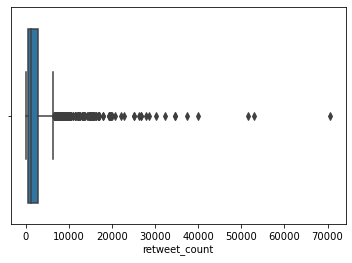

In [ ]:
sns.boxplot(twitter_archive_df_clean.retweet_count);

C:\Users\MAX.NG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


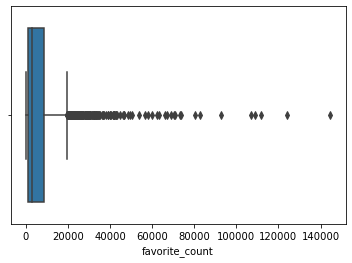

In [ ]:
sns.boxplot(twitter_archive_df_clean.favorite_count);

### Code

In [ ]:
# some times, we can have more than 1 modes hence the index [0]
mode_retweet = twitter_archive_df_clean.retweet_count.mode()[0]
mode_favorite = twitter_archive_df_clean.favorite_count.mode()[0]

twitter_archive_df_clean.retweet_count = twitter_archive_df_clean.retweet_count.fillna(mode_retweet)
twitter_archive_df_clean.favorite_count = twitter_archive_df_clean.favorite_count.fillna(mode_favorite)

#### Test

In [ ]:
sum(twitter_archive_df_clean.retweet_count.isna())

0

In [ ]:
sum(twitter_archive_df_clean.favorite_count.isna())

0

### Cleaning Issue 3: twitter_archive

**the retweets are not needed for analysis**

#### Define

- **drop** the rows where the 'retweeted_status_id' or the in_reply_to_status_id column is not blank.

- then **drop** the ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp') columns.

In [ ]:
# twitter_archive_df_clean[twitter_archive_df_clean.retweeted_status_id.notna()]

#### Code

In [ ]:
# you can use a function here

twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.retweeted_status_id.isnull()]

twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.in_reply_to_status_id.isna()]

twitter_archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [ ]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   dog_stage           336 non-null    object 
 9   retweet_count       2097 non-null   float64
 10  favorite_count      2097 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 196.6+ KB


### Cleaning Issue 4 - twitter_archive
**erroneous ratings - line 516 sam's rating of 24/7 is invalid, (These ratings almost always have a denominator of 10.)**

#### Define
Since the data in this category are a few (17), we will drop them so that it doesn't impact our measure of distribution.

In [ ]:
twitter_archive_df_clean[twitter_archive_df_clean.rating_denominator != 10]

#### Code

In [ ]:
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.rating_denominator == 10]

#### Test

In [ ]:
twitter_archive_df_clean[twitter_archive_df_clean.rating_denominator != 10].count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
dog_stage             0
retweet_count         0
favorite_count        0
dtype: int64

### Cleaning Issue 5: twitter_archive

**erroneous dtypes for (tweet_id, timestamp, retweet_count, favorite_count)**

#### Define

- convert tweet_id from **int** to **str** dtype and
- timestamp to **datetime** dtype
- convert retweet_count, favorite_count to **int**

#### Code

In [ ]:
twitter_archive_df_clean.tweet_id = twitter_archive_df_clean.tweet_id.astype(str)

twitter_archive_df_clean.timestamp = pd.to_datetime(twitter_archive_df_clean.timestamp)

# change dtype from float to int
twitter_archive_df_clean.retweet_count = twitter_archive_df_clean.retweet_count.astype('int64')

twitter_archive_df_clean.favorite_count = twitter_archive_df_clean.favorite_count.astype('int64')

#### Test

In [ ]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2080 non-null   object             
 1   timestamp           2080 non-null   datetime64[ns, UTC]
 2   source              2080 non-null   object             
 3   text                2080 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2080 non-null   int64              
 6   rating_denominator  2080 non-null   int64              
 7   name                2080 non-null   object             
 8   dog_stage           336 non-null    object             
 9   retweet_count       2080 non-null   int64              
 10  favorite_count      2080 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 195.0+ KB


### Cleaning Issue 6: image_prediction data
**erroneous dtype for (tweet_id)**

In [ ]:
image_prediction_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          6225 non-null   int64  
 1   jpg_url           6225 non-null   object 
 2   img_num           6225 non-null   int64  
 3   prediction_cycle  6225 non-null   object 
 4   prediction        6225 non-null   object 
 5   confidence        6225 non-null   float64
 6   isDogBreed        6225 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 298.0+ KB


#### Define

- convert the dtype from **int** to **str** dtype

#### Code

In [ ]:
# image_prediction_df_clean.tweet_id = image_prediction_df_clean.tweet_id.map(str)
# image_prediction_df.tweet_id = image_prediction_df_clean.tweet_id.astype(pd.Int64Dtype())
# pd.to_numeric(image_prediction_df_clean.tweet_id, errors = 'coerce', downcast='signed')
image_prediction_df_clean.tweet_id = image_prediction_df_clean.tweet_id.astype(str)

#### Test

In [ ]:
image_prediction_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          6225 non-null   object 
 1   jpg_url           6225 non-null   object 
 2   img_num           6225 non-null   int64  
 3   prediction_cycle  6225 non-null   object 
 4   prediction        6225 non-null   object 
 5   confidence        6225 non-null   float64
 6   isDogBreed        6225 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 298.0+ KB


### Cleaning Issue 7: image_prediction data
**false dog breeds are not needed**

#### Define
**drop** all rows where the prediction is not a breed of dog. That is, isDogBreed is False.

In [ ]:
image_prediction_df_clean[image_prediction_df_clean.isDogBreed == False].count()

tweet_id            1641
jpg_url             1641
img_num             1641
prediction_cycle    1641
prediction          1641
confidence          1641
isDogBreed          1641
dtype: int64

#### Code

In [ ]:
image_prediction_df_clean = image_prediction_df_clean[image_prediction_df_clean.isDogBreed == True]

#### Test

In [ ]:
image_prediction_df_clean[image_prediction_df_clean.isDogBreed == False].count()

tweet_id            0
jpg_url             0
img_num             0
prediction_cycle    0
prediction          0
confidence          0
isDogBreed          0
dtype: int64

### Cleaning Issue 8: image_prediction data
**only the most confident prediction is required**

#### Define
**Group** the data by the predictions and pick the prediction with the highest confidence.

In [ ]:
image_prediction_df_clean.tweet_id.count()

4584

#### Code

In [ ]:
stat_cols = ['tweet_id', 'jpg_url', 'img_num']
var_cols = ['confidence', 'prediction_cycle', 'prediction', 'isDogBreed']
image_prediction_df_clean.prediction_cycle.value_counts()

p2    1553
p1    1532
p3    1499
Name: prediction_cycle, dtype: int64

In [ ]:
image_prediction_df_clean = image_prediction_df_clean.groupby(stat_cols)[var_cols].max().reset_index()

#### Test

In [ ]:
image_prediction_df_clean.sample(5)

,tweet_id,jpg_url,img_num,confidence,prediction_cycle,prediction,isDogBreed
1664,871762521631449091,https://pbs.twimg.com/media/DBkfY58XcAEdzZy.jpg,2,0.921393,p3,golden_retriever,True
1056,751456908746354688,https://pbs.twimg.com/ext_tw_video_thumb/75145...,1,0.714409,p3,golden_retriever,True
28,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,0.184130,p1,Chesapeake_Bay_retriever,True
143,669353438988365824,https://pbs.twimg.com/media/CUoFZTyW4AE70iD.jpg,1,0.212343,p3,chow,True
1271,790581949425475584,https://pbs.twimg.com/media/Cvi2FiKWgAAif1u.jpg,2,0.000153,p3,malinois,True


In [ ]:
image_prediction_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1751 non-null   object 
 1   jpg_url           1751 non-null   object 
 2   img_num           1751 non-null   int64  
 3   confidence        1751 non-null   float64
 4   prediction_cycle  1751 non-null   object 
 5   prediction        1751 non-null   object 
 6   isDogBreed        1751 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 83.9+ KB


- Finally lets merge the twiiter data and the image prediction

In [ ]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2080 non-null   object             
 1   timestamp           2080 non-null   datetime64[ns, UTC]
 2   source              2080 non-null   object             
 3   text                2080 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2080 non-null   int64              
 6   rating_denominator  2080 non-null   int64              
 7   name                2080 non-null   object             
 8   dog_stage           336 non-null    object             
 9   retweet_count       2080 non-null   int64              
 10  favorite_count      2080 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 195.0+ KB


In [ ]:
master_twitter_df = twitter_archive_df_clean.merge(image_prediction_df_clean[['tweet_id', 'jpg_url', 'prediction']], how = 'outer', on = 'tweet_id')

In [ ]:
# drop NaN in the prediction and text columns
master_twitter_df.dropna(subset=['prediction', 'text'], inplace = True)

# master_twitter_df.prediction.dropna( inplace= True)
master_twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 1 to 2079
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1650 non-null   object             
 1   timestamp           1650 non-null   datetime64[ns, UTC]
 2   source              1650 non-null   object             
 3   text                1650 non-null   object             
 4   expanded_urls       1650 non-null   object             
 5   rating_numerator    1650 non-null   float64            
 6   rating_denominator  1650 non-null   float64            
 7   name                1650 non-null   object             
 8   dog_stage           257 non-null    object             
 9   retweet_count       1650 non-null   float64            
 10  favorite_count      1650 non-null   float64            
 11  jpg_url             1650 non-null   object             
 12  prediction          1650 non-null 

In [ ]:
# rename prediction to dogbreed for clarity
master_twitter_df.rename(columns = {'prediction' : 'dogBreed'}, inplace =  True)
master_twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 1 to 2079
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1650 non-null   object             
 1   timestamp           1650 non-null   datetime64[ns, UTC]
 2   source              1650 non-null   object             
 3   text                1650 non-null   object             
 4   expanded_urls       1650 non-null   object             
 5   rating_numerator    1650 non-null   float64            
 6   rating_denominator  1650 non-null   float64            
 7   name                1650 non-null   object             
 8   dog_stage           257 non-null    object             
 9   retweet_count       1650 non-null   float64            
 10  favorite_count      1650 non-null   float64            
 11  jpg_url             1650 non-null   object             
 12  dogBreed            1650 non-null 

In [ ]:
# change dtype from float to int
master_twitter_df.retweet_count = master_twitter_df.retweet_count.astype('int64')

master_twitter_df.favorite_count = master_twitter_df.favorite_count.astype('int64')

## Storing Data
The gathered, assessed, and cleaned master dataset is saved to a CSV file named "twitter_archive_master.csv".

In [ ]:
master_twitter_df.to_csv('twitter_master.csv', index = False)
# master_twitter_df.to_sql('twitter_archive_master.sql', con = 'sqlalchemy.engine', index = False)